## REGULARIZATION - LASSO (L1)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Ames_Housing_Clean_Data_no_remove_skew.csv')

In [5]:
df[['Lot Area','Year Built','Year Remod/Add','Mas Vnr Area','BsmtFin SF 1','Total Bsmt SF','2nd Flr SF','Gr Liv Area','Garage Yr Blt','Garage Area','Wood Deck SF','Open Porch SF','Screen Porch','SalePrice']].tail()

,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,2nd Flr SF,Gr Liv Area,Garage Yr Blt,Garage Area,Wood Deck SF,Open Porch SF,Screen Porch,SalePrice
2830,7937,1984,1984,0.0,819.0,1003.0,0,1003,1984.0,588.0,120,0,0,142500
2831,8885,1983,1983,0.0,301.0,864.0,0,902,1983.0,484.0,164,0,0,131000
2832,10441,1992,1992,0.0,337.0,912.0,0,970,0.0,0.0,80,32,0,132000
2833,10010,1974,1975,0.0,1071.0,1389.0,0,1389,1975.0,418.0,240,38,0,170000
2834,9627,1993,1994,94.0,758.0,996.0,1004,2000,1993.0,650.0,190,48,0,188000


## adjusting skewed feature

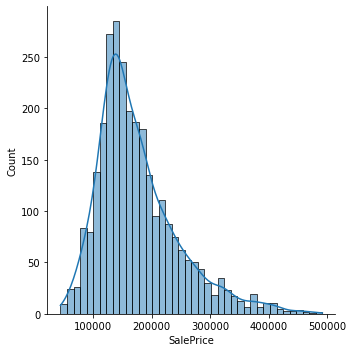

In [6]:
sns.displot(data=df,x='SalePrice',kde=True);

In [7]:
df['SalePrice'].skew()

1.226112963757501

In [8]:
df['SalePrice']=np.sqrt(df['SalePrice'])

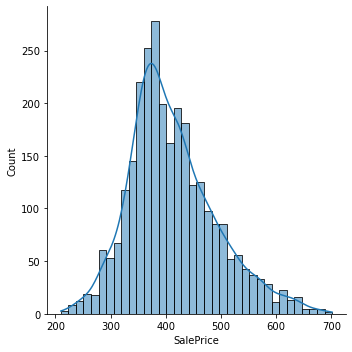

In [9]:
sns.displot(data=df,x='SalePrice',kde=True);

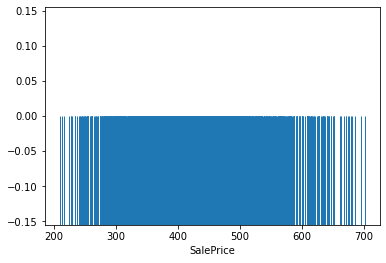

In [10]:
sns.rugplot(x='SalePrice',data=df,height=0.5);

# observe if there is any outliers within SalePrice itself so we had some information on which dataset to look on
# sale price above 700000 seems like an outliers

In [11]:
x=df.drop(['SalePrice'],axis=1)
y=df['SalePrice']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [14]:
x_train

,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCond_AdjLand,SaleCond_Alloca,SaleCond_Family,SaleCond_Normal,SaleCond_Partial
2042,78.000000,9317,1,0,6,5,2006,2006,0.0,1,...,0,0,0,0,1,0,0,0,1,0
1920,40.000000,3880,0,0,5,9,1945,1997,0.0,2,...,0,0,0,0,1,0,0,0,1,0
938,78.870370,6853,1,0,8,5,2001,2002,136.0,1,...,0,0,0,0,1,0,0,0,1,0
824,67.000000,16285,2,0,7,5,2001,2002,0.0,1,...,0,0,0,0,1,0,0,0,1,0
90,25.000000,4835,1,0,7,5,2004,2005,0.0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,80.000000,9600,0,0,5,7,1950,2007,0.0,1,...,0,0,0,0,1,0,0,0,1,0
1599,80.000000,11584,0,0,7,6,1979,1979,96.0,2,...,0,0,0,0,1,0,0,0,1,0
1361,85.176471,2887,0,0,6,5,1996,1997,0.0,2,...,0,0,0,0,1,0,0,0,1,0
1547,21.000000,1596,0,0,4,6,1973,1973,0.0,2,...,0,0,0,0,1,0,0,0,1,0


In [15]:
len(x_train)

1984

In [16]:
len(x_test)

851

**Create an Estimator**

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model=LinearRegression()

In [19]:
model.fit(x_train,y_train)

LinearRegression()

In [20]:
test_pred=model.predict(x_test)

In [21]:
y_test

1234    398.748041
1249    396.862697
1871    339.116499
80      334.664011
917     273.861279
           ...    
759     287.228132
660     344.818793
2118    334.664011
1067    500.000000
38      539.389470
Name: SalePrice, Length: 851, dtype: float64

In [22]:
test_pred

array([406.40473058, 392.06261863, 345.78370682, 346.64430965,
       260.89633669, 394.74553435, 546.8262674 , 411.79957119,
       479.85013647, 366.4028896 , 422.45122315, 507.20743283,
       339.46542622, 362.07590764, 400.1377628 , 309.54701601,
       650.38065961, 275.93793671, 359.42535348, 372.73252216,
       487.78057027, 530.28977025, 367.77412139, 401.9467057 ,
       294.10734644, 484.05769457, 556.315236  , 314.57886446,
       412.67199843, 405.32754968, 379.68482793, 319.99693094,
       427.65686959, 369.51232194, 388.82069418, 474.76195519,
       604.33382899, 408.86016757, 284.071697  , 298.60262487,
       285.26309192, 302.31937172, 422.4736446 , 481.12301053,
       516.98408259, 450.04020476, 524.15420961, 374.60150601,
       354.87512181, 363.56086669, 496.66002734, 410.57095311,
       335.12530591, 388.15095671, 497.80256515, 439.22906782,
       291.60164626, 503.82440328, 467.030768  , 336.19571378,
       416.17839809, 405.08972567, 358.87019063, 369.84

**Test 1 - MAE, MSE, RMSE**

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [24]:
MAE=mean_absolute_error(y_test,test_pred)

MAE**2

217.21506155626633

In [25]:
MSE = mean_squared_error(y_test,test_pred)

MSE = MSE**2

MSE

152932.48110013394

In [26]:
RMSE= np.sqrt(MSE)

RMSE

391.0658270676868

In [27]:
#predict on train set

train_pred=model.predict(x_train)

MSE = mean_squared_error(y_train,train_pred)
MSE = MSE**2
RMSE= np.sqrt(MSE)
RMSE

339.78603927609964

If the RMSE for the test set is much higher than that of the training set, it is likely that you've badly over fit the data, i.e. you've created a model that tests well in sample, but has little predictive value when tested out of sample.

In [28]:
df['SalePrice'].mean()

412.2567174216169

In [29]:
RMSE*100/df['SalePrice'].mean()**2

0.1999263555648569

0.2% percent of error percentage for predicting sales price

In [30]:
from sklearn.metrics import r2_score

In [31]:
accuracy= round(r2_score(y_test, test_pred), 2)

accuracy

0.94

**Test 2 - Residual Plot and Distribution Plot**

In [32]:
test_res=y_test-test_pred

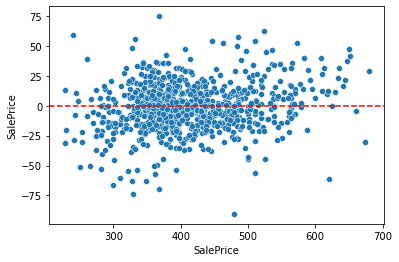

In [33]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0,color='red',linestyle='--');

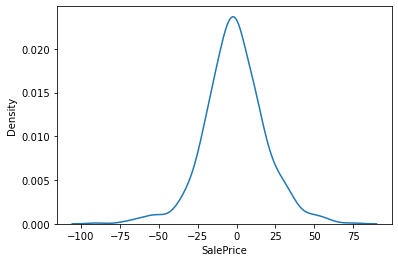

In [34]:
sns.kdeplot(test_res);

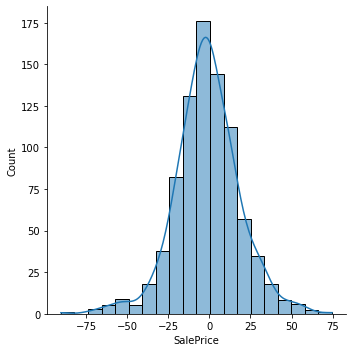

In [35]:
sns.displot(test_res,bins=20,kde=True);

**Test 3 - Probability Plot**

In [36]:
import scipy as sp

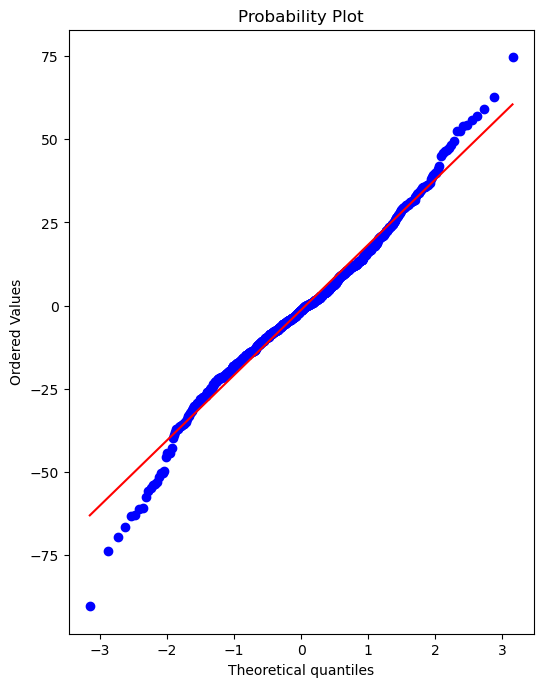

In [37]:
fig,ax=plt.subplots(figsize=(6,8),dpi=100)

_=sp.stats.probplot(test_res,plot=ax)


In [38]:
model.coef_

array([ 3.00222980e-02,  5.22983200e-04,  7.78546026e-01, -1.96918297e+00,
        8.72826190e+00,  5.52669285e+00,  3.33668036e-01,  4.88974765e-02,
        1.88408355e-02, -4.64879954e+00,  1.56908608e+00, -6.31806894e+00,
       -1.26020963e+00, -3.57170212e+00,  1.40045649e-02,  9.30776599e-03,
       -4.45488079e-03,  1.88574523e-02, -2.17260086e+00, -6.36331259e-01,
        2.23874858e-02,  1.78314074e-02, -3.43539667e-03,  3.67834907e-02,
        3.25769030e+00,  2.85330735e+00,  4.38396139e+00,  3.90715799e+00,
       -2.43527511e+00, -1.92985997e+00, -5.13996212e+00,  8.25300208e-01,
        2.19488425e+00, -9.10220759e-01, -4.44228224e-06,  2.36405175e-01,
        5.16655488e+00,  1.49074260e-02, -4.94228615e+00,  1.59877160e+00,
        1.29683564e-02,  1.99900037e-02,  1.75203639e-02,  3.04139447e-02,
        3.97104216e-02, -4.22774630e-03,  8.60418361e-04,  7.88959642e-02,
       -6.17585723e-01, -1.49500398e+00,  3.50181473e+00,  2.40641730e+00,
        5.62167917e+00, -

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [41]:
x

,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCond_AdjLand,SaleCond_Alloca,SaleCond_Family,SaleCond_Normal,SaleCond_Partial
0,141.000000,31770,1,0,6,5,1960,1960,112.0,2,...,0,0,0,0,1,0,0,0,1,0
1,80.000000,11622,0,0,5,6,1961,1961,0.0,2,...,0,0,0,0,1,0,0,0,1,0
2,81.000000,14267,1,0,6,6,1958,1958,108.0,2,...,0,0,0,0,1,0,0,0,1,0
3,93.000000,11160,0,0,7,5,1968,1968,0.0,1,...,0,0,0,0,1,0,0,0,1,0
4,74.000000,13830,1,0,5,5,1997,1998,0.0,2,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830,37.000000,7937,1,0,6,6,1984,1984,0.0,2,...,0,0,0,0,1,0,0,0,1,0
2831,75.157303,8885,1,1,5,5,1983,1983,0.0,2,...,0,0,0,0,1,0,0,0,1,0
2832,62.000000,10441,0,0,5,5,1992,1992,0.0,2,...,0,0,0,0,1,0,0,0,1,0
2833,77.000000,10010,0,1,5,5,1974,1975,0.0,2,...,0,0,0,0,1,0,0,0,1,0


In [42]:
y**2

0       215000.0
1       105000.0
2       172000.0
3       244000.0
4       189900.0
          ...   
2830    142500.0
2831    131000.0
2832    132000.0
2833    170000.0
2834    188000.0
Name: SalePrice, Length: 2835, dtype: float64

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler=StandardScaler()

In [45]:
scaler.fit(x_train)

StandardScaler()

In [46]:
x_train=scaler.transform(x_train)

In [47]:
x_test=scaler.transform(x_test)

In [48]:
from sklearn.linear_model import LassoCV

In [49]:
lasso_cv_model=LassoCV(eps=0.1,n_alphas=100,cv=5)

In [50]:
lasso_cv_model.fit(x_train,y_train)

LassoCV(cv=5, eps=0.1)

In [51]:
lasso_cv_model.alpha_

6.481382869014167

In [52]:
test_pred=lasso_cv_model.predict(x_test)

In [53]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [54]:
MAE=mean_absolute_error(y_test,test_pred)

MAE**2

387.70619853741005

In [55]:
MSE=mean_squared_error(y_test,test_pred)

MSE**2

471553.288269219

In [56]:
RMSE=np.sqrt(MSE)

RMSE

26.204911324078108

In [57]:
## train performance

train_pred=lasso_cv_model.predict(x_train)
MSE = mean_squared_error(y_train,train_pred)

MSE = MSE**2
RMSE= np.sqrt(MSE)
RMSE

779.2685965583003

In [58]:
df['SalePrice'].mean()**2

169955.60105924687

In [59]:
RMSE*100/df['SalePrice'].mean()**2

0.45851304205422777

0.5% percent of error percentage for predicting sales price

In [60]:
from sklearn.metrics import r2_score

In [61]:
accuracy= round(r2_score(y_test, test_pred), 2)

accuracy

0.89

closer the value to 1, higher the accuracy of model

**Test 2 - Residual Plot and Distribution Plot**

In [62]:
test_res=y_test-test_pred

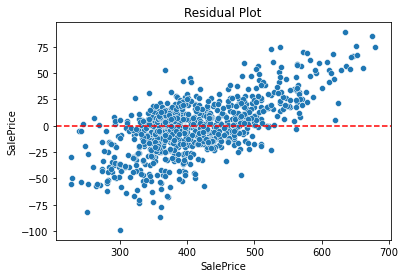

In [63]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0,color='red',linestyle='--')
plt.title('Residual Plot');

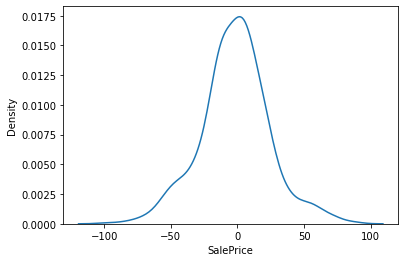

In [64]:
sns.kdeplot(test_res);

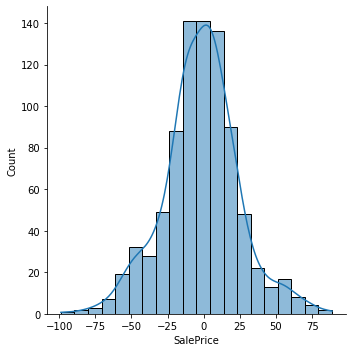

In [65]:
sns.displot(test_res,bins=20,kde=True);

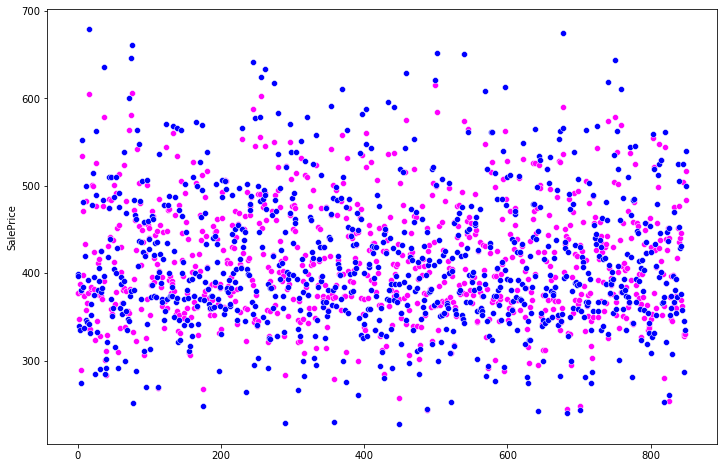

In [66]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x=range(len(test_pred)),y=test_pred,color='magenta')
sns.scatterplot(x=range(len(y_test)),y=y_test,color='blue');

**Test 3 - Probability Plot**

In [67]:
import scipy as sp

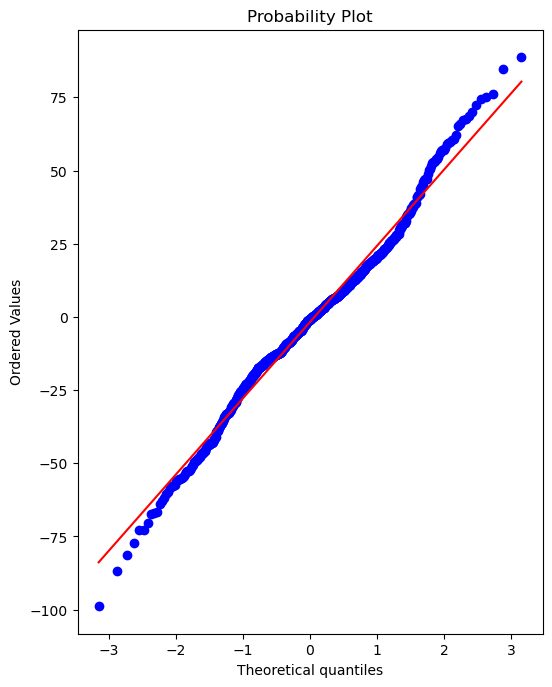

In [68]:
fig,ax=plt.subplots(figsize=(6,8),dpi=100)

_=sp.stats.probplot(test_res,plot=ax)


In [69]:
lasso_cv_model.coef_

array([ 0.38524156,  0.20688335,  0.        ,  0.        , 21.1606324 ,
        0.        ,  4.28206042,  1.89084758,  0.        , -4.93050123,
       -0.        , -2.68415903, -0.        , -1.26511595,  6.17224598,
        0.        , -0.        ,  5.70241612, -0.39537473, -0.        ,
        2.83142585,  0.        , -0.        , 20.29314719,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -5.66190711,  0.        ,  0.        , -3.35945074,  0.        ,
       -1.10427349,  3.32054643,  4.62146682, -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        , -1.38

**direct method to filter useful features through lasso**

reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

## re train with only features provide by lasso

In [70]:
lasso_coef=lasso_cv_model.coef_

In [71]:
lasso_coef[lasso_coef>0]

array([ 0.38524156,  0.20688335, 21.1606324 ,  4.28206042,  1.89084758,
        6.17224598,  5.70241612,  2.83142585, 20.29314719,  3.32054643,
        4.62146682,  0.36269954])

In [72]:
np.where(lasso_coef>0)

(array([  0,   1,   4,   6,   7,  14,  17,  20,  23,  36,  37, 223],
       dtype=int64),)

In [73]:
lasso_coef.shape

(232,)

In [74]:
df.columns[[  0,   1,   4,   6,   7,  14,  17,  20,  23,  36,  37]]

Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Year Built',
       'Year Remod/Add', 'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF',
       'Gr Liv Area', 'Garage Cars', 'Garage Area'],
      dtype='object')

In [75]:
x=df[['Lot Frontage', 'Lot Area', 'Overall Qual', 'Year Built',
       'Year Remod/Add', 'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF',
       'Gr Liv Area', 'Garage Cars', 'Garage Area']]
y=df['SalePrice']

In [76]:
x

,Lot Frontage,Lot Area,Overall Qual,Year Built,Year Remod/Add,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Cars,Garage Area
0,141.000000,31770,6,1960,1960,639.0,1080.0,1656,1656,2.0,528.0
1,80.000000,11622,5,1961,1961,468.0,882.0,896,896,1.0,730.0
2,81.000000,14267,6,1958,1958,923.0,1329.0,1329,1329,1.0,312.0
3,93.000000,11160,7,1968,1968,1065.0,2110.0,2110,2110,2.0,522.0
4,74.000000,13830,5,1997,1998,791.0,928.0,928,1629,2.0,482.0
...,...,...,...,...,...,...,...,...,...,...,...
2830,37.000000,7937,6,1984,1984,819.0,1003.0,1003,1003,2.0,588.0
2831,75.157303,8885,5,1983,1983,301.0,864.0,902,902,2.0,484.0
2832,62.000000,10441,5,1992,1992,337.0,912.0,970,970,0.0,0.0
2833,77.000000,10010,5,1974,1975,1071.0,1389.0,1389,1389,2.0,418.0


In [77]:
y**2

0       215000.0
1       105000.0
2       172000.0
3       244000.0
4       189900.0
          ...   
2830    142500.0
2831    131000.0
2832    132000.0
2833    170000.0
2834    188000.0
Name: SalePrice, Length: 2835, dtype: float64

In [78]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
final_scaler=StandardScaler()

In [81]:
final_scaler.fit(x_train)

StandardScaler()

In [82]:
x_train=final_scaler.transform(x_train)

In [83]:
x_test=final_scaler.transform(x_test)

In [84]:
from sklearn.linear_model import LassoCV

In [85]:
final_lasso_cv_model=LassoCV()

In [86]:
final_lasso_cv_model.fit(x_train,y_train)

LassoCV()

In [87]:
final_lasso_cv_model.alpha_

0.09187192756863995

In [88]:
test_pred=final_lasso_cv_model.predict(x_test)

In [89]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [90]:
MAE=mean_absolute_error(y_test,test_pred)

MAE**2

355.47776611589796

In [91]:
MSE=mean_squared_error(y_test,test_pred)

MSE=MSE**2

In [92]:
RMSE=np.sqrt(MSE)

RMSE

612.8650395711043

In [93]:
## train performance

train_pred=final_lasso_cv_model.predict(x_train)

MSE = mean_squared_error(y_train,train_pred)
MSE = MSE**2
RMSE= np.sqrt(MSE)
RMSE

747.6380572240156

In [94]:
df['SalePrice'].mean()**2

169955.60105924687

In [95]:
RMSE*100/df['SalePrice'].mean()**2

0.43990198179075457

0.4% percent of error percentage for predicting sales price

In [96]:
from sklearn.metrics import r2_score

In [97]:
accuracy= round(r2_score(y_test, test_pred), 2)

accuracy

0.9

closer the value to 1, higher the accuracy of model

**Test 2 - Residual Plot and Distribution Plot**

In [98]:
test_res=y_test-test_pred

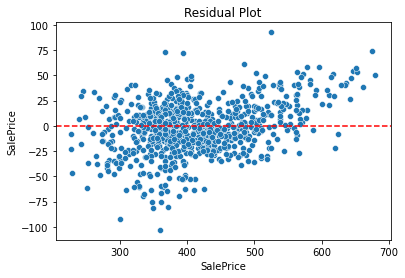

In [99]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0,color='red',linestyle='--')
plt.title('Residual Plot');

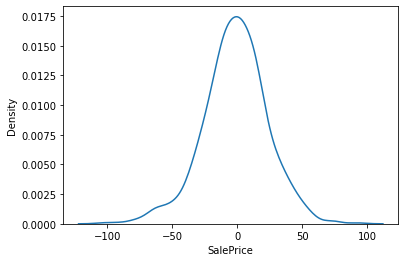

In [100]:
sns.kdeplot(test_res);

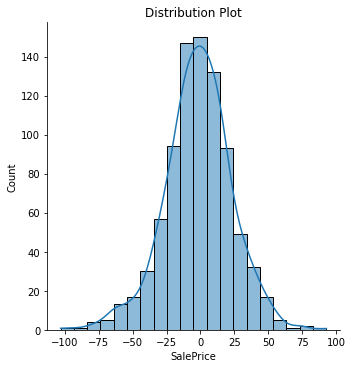

In [101]:
sns.displot(test_res,bins=20,kde=True)
plt.title('Distribution Plot');

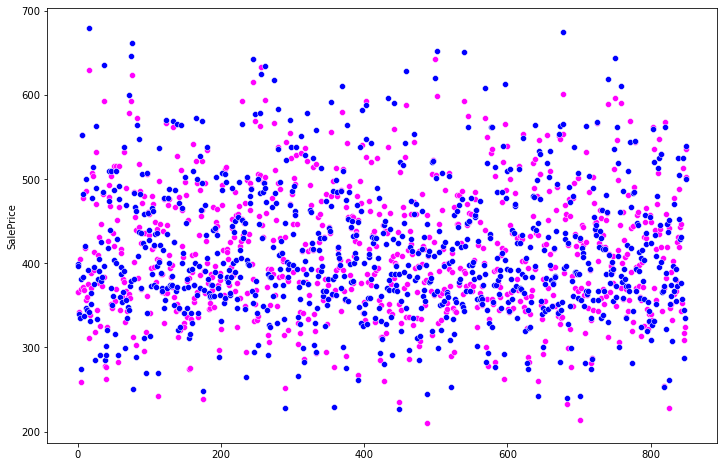

In [102]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x=range(len(test_pred)),y=test_pred,color='magenta')
sns.scatterplot(x=range(len(y_test)),y=y_test,color='blue');

**Test 3 - Probability Plot**

In [103]:
import scipy as sp

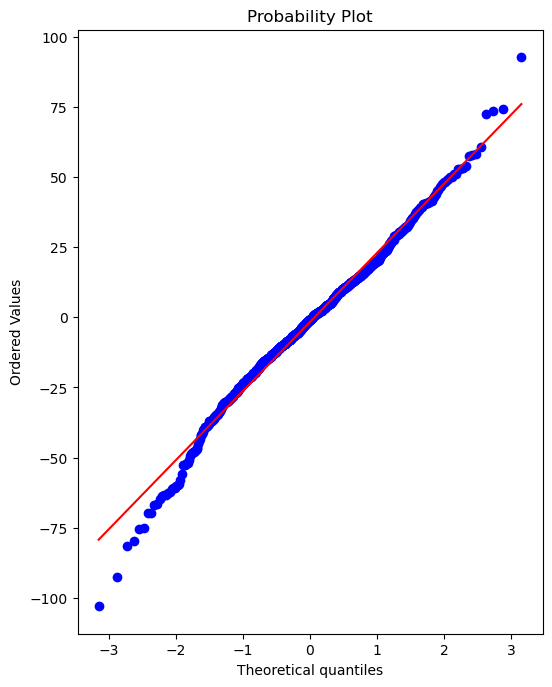

In [104]:
fig,ax=plt.subplots(figsize=(6,8),dpi=100)

_=sp.stats.probplot(test_res,plot=ax)


In [105]:
final_lasso_cv_model.coef_

array([ 3.77324084,  4.72380037, 27.97248952,  9.29658244,  8.32520418,
       11.04494001,  8.25771792,  2.00932481, 23.82562277,  3.64221244,
        5.06049671])

## testing model

In [106]:
predict_sales=[[141,31770,6,1960,1960,639,1080,1656,1656,2,528]]

In [107]:
predict_sales=final_scaler.transform(predict_sales)

In [108]:
final_lasso_cv_model.predict(predict_sales)**2

array([200209.20280369])

In [109]:
final_lasso_cv_model.intercept_

412.44566651829916

In [110]:
pred=predict_sales[0][0]*final_lasso_cv_model.coef_[0]+predict_sales[0][1]*final_lasso_cv_model.coef_[1]+predict_sales[0][2]*final_lasso_cv_model.coef_[2]+predict_sales[0][3]*final_lasso_cv_model.coef_[3]+predict_sales[0][4]*final_lasso_cv_model.coef_[4]+predict_sales[0][5]*final_lasso_cv_model.coef_[5]+predict_sales[0][6]*final_lasso_cv_model.coef_[6]+predict_sales[0][7]*final_lasso_cv_model.coef_[7]+predict_sales[0][8]*final_lasso_cv_model.coef_[8]+predict_sales[0][9]*final_lasso_cv_model.coef_[9]+predict_sales[0][10]*final_lasso_cv_model.coef_[10]+final_lasso_cv_model.intercept_

In [111]:
pred**2

200209.2028036861

## model deployment

In [112]:
from joblib import dump, load

In [113]:
dump(final_scaler,'ames_scaler.pkl')

['ames_scaler.pkl']

In [114]:
dump(final_lasso_cv_model,'ames_model.h5')

['ames_model.h5']

In [115]:
from joblib import dump, load

sale_price_model = load('ames_model.h5')

sale_price_scaler = load('ames_scaler.pkl')

def return_prediction(model,scaler,sample_json):
    
    lot_front = sample_json['Lot Frontage']
    lot_area = sample_json['Lot Area']
    ovr_qual = sample_json['Overall Qual']
    yr_built = sample_json['Year Built']
    yr_remod = sample_json['Year Remod/Add']
    bsmt_fin = sample_json['BsmtFin SF 1']
    t_bsmt_sf = sample_json['Total Bsmt SF']
    first_flr_sf = sample_json['1st Flr SF']
    gr_liv_area = sample_json['Gr Liv Area']
    gr_cars = sample_json['Garage Cars']
    gr_area = sample_json['Garage Area']
        
    
    sale_price = [[lot_front,lot_area,ovr_qual,yr_built,yr_remod,bsmt_fin,
                   t_bsmt_sf,first_flr_sf,gr_liv_area,gr_cars,gr_area]]
    
    sale_price = scaler.transform(sale_price)
    
    prediction = model.predict(sale_price)
    
    prediction = prediction**2
    
    prediction = np.round(prediction,2)
        
    return prediction[0]

In [116]:
load('ames_scaler.pkl')

load('ames_model.h5')

LassoCV()

## observe model performance

In [131]:
x=df[['Lot Frontage', 'Lot Area', 'Overall Qual', 'Year Built',
       'Year Remod/Add', 'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF',
       'Gr Liv Area', 'Garage Cars', 'Garage Area']]

x.tail()

,Lot Frontage,Lot Area,Overall Qual,Year Built,Year Remod/Add,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Cars,Garage Area
2830,37.000000,7937,6,1984,1984,819.0,1003.0,1003,1003,2.0,588.0
2831,75.157303,8885,5,1983,1983,301.0,864.0,902,902,2.0,484.0
2832,62.000000,10441,5,1992,1992,337.0,912.0,970,970,0.0,0.0
2833,77.000000,10010,5,1974,1975,1071.0,1389.0,1389,1389,2.0,418.0
2834,74.000000,9627,7,1993,1994,758.0,996.0,996,2000,3.0,650.0


In [133]:
y=y**2

y.tail()

2830    142500.0
2831    131000.0
2832    132000.0
2833    170000.0
2834    188000.0
Name: SalePrice, dtype: float64

In [134]:
sales_pred = {'Lot Frontage':37,
                 'Lot Area':7937,
                 'Overall Qual':6,
                 'Year Built':1984,
                 'Year Remod/Add':1984,
                 'BsmtFin SF 1':819,
                 'Total Bsmt SF':1003,
                 '1st Flr SF':1003,
                 'Gr Liv Area':1003,
                 'Garage Cars':2.0,
                 'Garage Area':598}

In [135]:
prediction = return_prediction(sale_price_model,sale_price_scaler,sales_pred)

In [136]:
prediction

157792.81

In [137]:
prediction - 142500

15292.809999999998

In [122]:
sales_pred = {'Lot Frontage':80,
                 'Lot Area':11622,
                 'Overall Qual':5,
                 'Year Built':1961,
                 'Year Remod/Add':1961,
                 'BsmtFin SF 1':468,
                 'Total Bsmt SF':882,
                 '1st Flr SF':896,
                 'Gr Liv Area':896,
                 'Garage Cars':1,
                 'Garage Area':730}

In [123]:
prediction = return_prediction(sale_price_model,sale_price_scaler,sales_pred)

In [124]:
prediction

122868.47

In [125]:
prediction - 105000

17868.47